# Ejercicio 1

In [48]:
'''Función que nos genera una población inicial de 2k individuos y 
   recibe como parámetros: La 'k' y el hipercubo al que pertenecen 
   los vectores (o sea, la dimensión 'n' y el intervalo [a,b] al que
   pertenecen cada una de las entradas de los vectores).'''

import numpy as np

def Generar_Poblacion(k, n, intervalo):
    
   a, b = intervalo

   # Se genera una matriz de tamaño (2k, n) con valorios aleatorios
   # uniformes (o sea, una población inicial de 2k individuos donde 
   # cada uno vive en Rn):
   poblacionMatriz = np.random.uniform(a,b, size=(2*k, n))

   # Para facilitarnos la vida, convertimos a la matriz en una lista
   # de listas:
   poblacionLista = poblacionMatriz.tolist()

   return poblacionLista



In [49]:
'''Definimos una función de aptitud que recibe como parámetros una
   función de prueba y una población de 2k individuos y retorna una
   lista con las probabilidades de selección (p_i) de todos los 
   individuos de la población. Además de que nos da al mejor individuo
   en la población.'''

def Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion, aptitud = 0):
    # Generamos una lista con las evaluaciones en la función objetivo
    evaluaciones = [funcion(individuo) for individuo in poblacion]

    #print("Evaluaciones:", [float(eval) for eval in evaluaciones], "\n")

    # Generamos una lista de las aptitudes de los individuos en la 
    # población.
    aptitudes = [np.exp(1e-9*(-evaluacion)) for evaluacion in evaluaciones]

    #print("Aptitudes:", [float(apt) for apt in aptitudes], "\n")

    # Encontramos el índice del mejor individuo (menor evaluación)
    mejorIndice = np.argmax(aptitudes)
    masApto = poblacion[mejorIndice]
    mayor_aptitud = max(aptitudes)

    #print("El individuo más apto fue:", masApto, "\n")

    # Obtenemos el 'tamaño del pastel':
    sumaAptitudes = sum(aptitudes)

    # Calculamos las probabilidades de selección (p_i) para todos los
    # individuos:
    probabilidades = [(aptitud/sumaAptitudes) for aptitud in aptitudes]

    #print("Probabilidades de selección:", [float(pi) for pi in probabilidades])

    promedio = sum(aptitudes)/ len(aptitudes)

    if aptitud == 0: # si no se requiere que se imprima la aptitud no la regresará
     return probabilidades, masApto
    
    if aptitud == 1:
       return probabilidades, masApto, promedio, mayor_aptitud


In [50]:
'''Definimos una función que recibe la lista de probabilidades 
   de selección y nos retorna la que corresponde a la de las 
   probabilidades acumulativas.'''

def Probas_Acumulativas(probabilidades):

    # Calculamos las probabilidades acumulativas (q_i) para todos los
    # individuos:
    probasAcumulativas = []
    sumaAcumulada = 0

    for proba in probabilidades:
        sumaAcumulada += proba
        probasAcumulativas.append(sumaAcumulada)

    #return probasAcumulativas
    return probasAcumulativas


In [51]:
'''Estas funciones son las que nos ayudan a generar a los padres mediante
   el uso de la ruleta.'''
   

'''La primera es para seleccionar padres (uno) y recibe como parámetro 
   la lista de las probabilidades acumulativas.
   
   Nos retornará el índice en la lista que le corresponde al padre 
   elegido con esa regla.'''

import random
import math

def Seleccionar_Padre_Ruleta(probasAcumuladas):
   r = random.random() # Generamos un número aleatorio entre 0 y 1

   tol=1e-9
   for i, probAcumulada in enumerate(probasAcumuladas):
      if r<= probAcumulada or math.isclose(r, probAcumulada, abs_tol=tol):
         return i # Índice del individuo seleccionado.


'''Le segunda es para generar la lista de padres elegidos para 
   reproducirse. Necesitamos 2k nuevos individuos, así que se van a 
   elegir k parejas (cada par de padres produce dos hijos).
   La función recibe como parámetros: la lista de individuos, las
   probabilidades aculativas y un máximo de intentos para intentar evitar
   la generación de clones (en este caso, vamos a considerar un máximo
   de 100 para cada elección de un segundo padre, pero tenemos la 
   apertura de modificarlo después).'''

def Generar_Parejas(individuos, probasAcumuladas, maxIntentos=100):
    parejas = []
    clonesGenerados = 0  # Contador de clones generados
    numIndividuos = len(individuos)

    if numIndividuos < 2:
        print("Error: No hay suficientes individuos para generar parejas.")
        return parejas, clonesGenerados

    # Como len(individuos)=2k, le pedimos que elija a len(individuos)/2
    # parejas de padres (que nos generarán 2k hijos).
    parejasNecesarias = int(numIndividuos/2)
    #print(f"Se necesitan {parejasNecesarias} parejas de padres.")

    for _ in range(parejasNecesarias):
        padre1_idx = Seleccionar_Padre_Ruleta(probasAcumuladas)

        intentos = 0
        while True:
            padre2_idx = Seleccionar_Padre_Ruleta(probasAcumuladas)

            if padre1_idx != padre2_idx:
                break  # Padres diferentes, salir del ciclo
            
            intentos += 1
            if intentos >= maxIntentos:  # Después de varios intentos, permitir clones
                padre2_idx = padre1_idx
                clonesGenerados += 2 # Cada pareja produce dos hijos
                #print(f"Se ha generado un clon tras {intentos} intentos.")
                break  # Salir del ciclo permitiendo el clon

        # Agregamos la pareja solo si hay padres válidos
        if padre1_idx is not None and padre2_idx is not None:
            parejas.append((individuos[padre1_idx], individuos[padre2_idx]))
        else:
            print("Error: No se pudieron seleccionar padres válidos.")

    return parejas, clonesGenerados


In [52]:
'''Funciones auxiliares para la codificación en binario.'''

def codifica_real(x, n_bit, intervalo):
    """
    Codifica un número real en el intervalo [a,b] utilizando nBit bits y una partición uniforme en [a, b].

    Parámetros:
    x: número a real a codificar.
    nBit: número de bits a utilizar.
    a: Extremo izquierdo del intervalo.
    b: Extremo derecho del intervalo.

    Retorno:
    Arreglo binario que representa al número real x con nBit bits en el intervalo [a, b].
    """
    
    a, b = intervalo
    
    # Calcula la precisión de la representación.
    precision = (b - a) / ((2 ** n_bit) - 1)

    # Asegura que el número esté dentro del rango de la partición.
    x = max(a, min(b, x))

    # Calcula el índice del número en la partición.
    index = int((x - a) / precision)

    # Codifica el índice a binario usando nuestro codigo para codificar naturales.
    if index < 0 or index >= (1 << n_bit):
        raise ValueError(f"Índice fuera del rango representable con {n_bit} bits.")

    x_binario = [0] * n_bit
    for i in range(n_bit - 1, -1, -1):
        x_binario[i] = index & 1
        index >>= 1

    # Devuelve el arreglo binario que representa al número real 'x'.
    return x_binario

def codifica_vector(vector_reales, n_bit, intervalo):
    """
    Codifica un vector de números reales en un vector de vectores binarios utilizando nBit bits.

    Parámetros:
    vector_reales: Arreglo de números reales a codificar
    dim_x: Diimensión del vector vector_reales
    nBit: Número de bits a utilizar para las entradas de nuestro arreglo.
    a: Extremo izquierdo del intervalo.
    b: Extremo derecho del intervalo.

    Retorno:
    Arreglo de arreglos arreglos binarios, donde cada subarreglo representa un número real codificado en binario
    """
    
    dim_x = len(vector_reales)

    # Inicializa un arreglo vacío para almacenar los vectores binarios.
    vector_binario = []

    # Itera sobre cada entrada de nuestro vector de reales.
    for i in range(dim_x):
        numero = vector_reales[i]

        # Codifica cada número utilizando la función codifica
        binario = codifica_real(numero, n_bit, intervalo)

        # Añade el resultado codificado al vector principal
        vector_binario.append(binario)

    # Devuelve un arreglo de arreglos binarios.
    return vector_binario


#print(f"El vector {[1.4,1.2,3,1.5674]} en binario con {10} bits es:\n")
#print(codifica_vector([1.4,1.2,3,1.5674],10,(1,5)))


In [53]:
'''Codificación de los padres en vectores binarios del estilo
   [[0,1,1,1,...], ..., [1, 1, 1, 0,...]]'''

def Padres_Binarios(parejas, nBits, intervalo):
   parejasBinarias = []

   for padre1, padre2 in parejas:

      padre1Bin = codifica_vector(padre1, nBits, intervalo)
      padre2Bin = codifica_vector(padre2, nBits, intervalo)

      parejasBinarias.append((padre1Bin, padre2Bin))
   
   return parejasBinarias


In [54]:
'''Función que realiza la cruza de n puntos. Recibe como parámetros: la
   lista de los padres (en arreglos binarios), el número de cortes que 
   se quieren hacer por cromosoma y el número de bits usados en la 
   codificación binaria. Retorna una lista de 2k hijos (como arreglos 
   binarios).'''

def Cruzar_N_Puntos(padresBinarios, nCortes, nBits):
    
    hijos = [] # Lista donde se guardará a los 2k hijos
    
    # Los `nCortes` son un parámetro recibido e idealmente es el que se
    # usará, en caso de que `nCortes` sea demasido grande, se hará el 
    # mayor número de cortes posible, o sea `nBits - 1`
    n = min(nCortes, (nBits - 1))
    
    for padre1, padre2 in padresBinarios:
        
        # Los hijos se van a crear cruzando cada cromosoma de los padres. 
        # Recordemos que cada pareja produce dos hijos.
        hijo1 = []
        hijo2 = []
        
        # Cruzamos cada cromosoma individualmente
        for cromo1, cromo2 in zip(padre1, padre2): # `zip(padre1, padre2)` toma los cromosomas 
                                                   # correspondientes de ambos padres al mismo 
                                                   # tiempo, es decir, empareja los cromosomas 
                                                   # que están en las mismas posiciones de las 
                                                   # listas `padre1` y `padre2`.
            
            # Determinar los puntos de cruce
            puntosCruce = sorted(random.sample(range(1, len(cromo1)), n))

            #print(puntosCruce) # En la primera iteración, si tenemos [1, 5]
                               # esto quiere decir que en el primer cromosoma
                               # de la pareja de padres, se van a hacer cruces
                               # en tres pedazos determinados por los dos cortes
                               # en las posiciones 1 y 5.
            
            # Inicializamos cromosomas vacíos para los hijos
            hijo1Cromo = []
            hijo2Cromo = []
            
            ultimoPunto = 0 # Punto en el que vamos para los cruces, inicia en 0.
            
            switch = False  # Esta bandera indica si debemos cambiar de padre
            
            # Alternamos entre segmentos de los padres en los puntos de cruza
            for punto in (puntosCruce + [len(cromo1)]): # Añadimos el valor len(cromo1) 
                                                        # al final de la lista de puntos de 
                                                        # cruza para asegurarnos de que el 
                                                        # último segmento después del último 
                                                        # punto de corte también se incluya. 
                                                        # De esta manera, recorremos todo el 
                                                        # cromosoma.
                
                # Seleccionamos los segmentos entre el último punto y el punto actual
                if switch:
                    hijo1Cromo += cromo2[ultimoPunto:punto] # El cromosoma del hijo1 recibe 
                                                            # parte del cromosoma del segundo
                                                            # padre.
                    hijo2Cromo += cromo1[ultimoPunto:punto] # El cromosoma del hijo2 recibe 
                                                            # parte del cromosoma del primer
                                                            # padre.
                else:
                    hijo1Cromo += cromo1[ultimoPunto:punto] # El cromosoma del hijo1 recibe 
                                                            # parte del cromosoma del primer
                                                            # padre.
                    hijo2Cromo += cromo2[ultimoPunto:punto] # El cromosoma del hijo2 recibe 
                                                            # parte del cromosoma del segundo
                                                            # padre.
                
                # Cambiamos el segmento
                switch = not switch # De esta manera garantizamos que vamos a 
                                    # ir alternando.
                ultimoPunto = punto # Nos movemos al siguiente punto de corte.
            
            # Añadimos el nuevo cromosoma a los hijos
            hijo1.append(hijo1Cromo)
            hijo2.append(hijo2Cromo)
        
        # Añadimos los dos hijos generados a la lista de hijos
        hijos.append(hijo1)
        hijos.append(hijo2)
    
    # Para este punto ya tenemos la lista de los hijos, así que lo que toca es
    # eliminar uno para hacerle espacio al individuo más apto.
    index_a_eliminar = random.randint(0, len(hijos)-1) # De manera aleatoria, 
                                                       # elegimos un índice para
                                                       # quitar un hijo de la lista.
    #print(hijos)
    #print(f'Eliminando al hijo en la posición: {index_a_eliminar}')
    del hijos[index_a_eliminar] # Borramos al hijo elegido.
    
    return hijos # Retornamos una lista de 2k-1 hijos (que era lo que queríamos)


In [55]:
'''Función que realiza la mutación de un bit elegido al azar: Por cada hijo
   elegimos un cromosoma al azar, dentro de ese cromosoma elegimos un bit al
   azar, generamos un número aleatorio r en [0,1]. Si r<probaMutar, cambiamos 
   el valor del bit, en otro caso el bit se queda igual.
   Recibimos como parámetros: la lista de los hijos (en binario) y una 
   probabilidad de mutación. La función retorna la lista (en binario) de los hijos
   que (posiblemente) han sido mutados.'''
   

import copy

def Mutador_1_flip(hijos, probaMutar):
    
    hijosMutados = []
    #huboMutacion = False # Variable para verificar si hubo al menos una mutación.

    for hijo in hijos:
        hijo = copy.deepcopy(hijo)  # Hacemos una copia profunda del hijo para no modificar el 
                                    # original. si no hacemos una copia de los hijos antes de 
                                    # realizar mutaciones, estaremos modificando las listas 
                                    # originales directamente. Lo que puede causarnos problemas
                                    # si luego intentamos usar los hijos originales en alguna 
                                    # otra operación.          

        if isinstance(hijo[0], list):  # Si el primer elemento es una lista, tenemos listas de 
                                       # cromosomas (o sea, la dimensión del problema es al 
                                       # menos 2).
            # Elegimos un cromosoma al azar dentro del hijo

            cromElegido_index = random.randint(0, len(hijo)-1) # Elegimos un índice al azar en 
                                                           # `hijo`. Este corresponde a un 
                                                           # cromosoma.
            cromElegido = hijo[cromElegido_index] # Fijamos el cromosoma elegido.

            bit_index = random.randint(0, len(cromElegido)-1) # Elegimos un índice al azar en 
                                                              # el cromosoma elegido, este 
                                                              # corresponde a alguno de los 
                                                              # nBits.
        
            r = random.random() # Generamos un número aleatorio entre 0 y 1.

            # Si el número aleatorio es menor que la probabilidad de mutación p_m
            if r < probaMutar:
            
                # Hacemos flip al bit: si es 0 lo cambiamos a 1, si es 1 lo cambiamos a 0
                cromElegido[bit_index] = 1 if cromElegido[bit_index] == 0 else 0

                #huboMutacion = True

            # Añadimos el cromosoma (posiblemente mutado) a la lista de hijosMutados
            hijosMutados.append(hijo)

        else: # Si el  no es una lista de listas, es directamente un cromosoma (o sea, la
              # dimensión del problema es 1).
        
            bit_index = random.randint(0, len(hijo)-1) # Elegimos un bit al azar dentro del 
                                                       # cromosoma (en este caso, cada hijo
                                                       # es su propio cromosoma).
            
            r = random.random() # Generamos un número aleatorio entre 0 y 1.

            # Si el número aleatorio es menor que la probabilidad de mutación p_m
            if r < probaMutar:
                hijo[bit_index] = 1 if hijo[bit_index] == 0 else 0 # Flip del bit.

                #huboMutacion = True

            # Añadimos el cromosoma (posiblemente mutado) a la lista de hijosMutados
            hijosMutados.append(hijo)
    
    #print("Hubo mutación:", huboMutacion)

    return hijosMutados


In [56]:
'''Funciones auxiliares para pasar a los hijos (posiblemente) mutados de su 
   codificación en arreglos de bits a vectores de números reales.'''

def decodifica(x_cod, nBits, intervalo):
    """
    Decodifica un vector de bits como un número real en el intervalo [a, b].

    Parámetros:
    x_cod: vector de bits a decodificar
    nBits: número de bits a utilizar
    intervalo: De la forma [a, b]

    Retorno:
    número real decodificado
    """

    a, b = intervalo
    precision = (b - a) / ((2 ** nBits) - 1)  # Calcula la precisión de la representación
    indice = int(''.join(map(str, x_cod)), 2)  # Convierte el vector de bits en un número entero
    x_dec = a + indice * precision  # Calcula el número real decodificado

    return x_dec

def decodifica_vector(vector_binario, nBits, intervalo):
    """
    Decodifica un vector de arreglos binarios en un vector de números reales.

    Parámetros:
    vector_binario: lista de listas de enteros, donde cada sublista representa un número codificado en binario
    nBits: número de bits a utilizar para cada número
    a: límite inferior de la partición
    b: límite superior de la partición

    Retorno:

    lista de números reales decodificados
    """

    dim_x = len(vector_binario)


    vector_reales = []

    for i in range(dim_x):
        binario = vector_binario[i]
        # Decodifica cada número utilizando la función decodifica
        real = decodifica(binario, nBits, intervalo)
        # Añade el resultado decodificado al vector principal
        vector_reales.append(real)

    return vector_reales


In [57]:
'''Función que decodifica a los hijos mutados para el reemplazo en la 
   siguiente generación. Recibe como parámetros a loss hijos (posiblemente) 
   mutados (codificados en bits), la cantidad de nBits usada en la codificación
   y el intervalo de nuestra función objetivo.   
   Retorna la lista de los hijos como vectores de números reales.'''

def Hijos_Decodificados(hijosMutados, nBits, intervalo):
    hijosDecodificados = []
    for hijoMutado in hijosMutados:
        hijoDecodificado = decodifica_vector(hijoMutado, nBits, intervalo)
        hijosDecodificados.append(hijoDecodificado)

    return(hijosDecodificados)


In [58]:
'''Función que nos da la siguiente generacion completa. Recibe como
   parámetros la lista de los 2k-1 hijos decodificados como vectores de 
   números reales y agrega a la lista al individuo más apto para que 
   tener el reemplazo con elitismo.'''

def Siguiente_Gen(hijosDecodificados, masApto):
    siguenteGeneracion = hijosDecodificados + [masApto]
    return siguenteGeneracion


In [59]:
'''Función que realiza una ejecución del algoritmo genético. Recibe como
   parámetros: la función objetivo a minimizar, el intervalo de ésta, la
   dimensión del problema, la mitad del tamaño de la población (pues vamos
   a tomar 2*(kindividuos)), la cantidad de bits para la codificación en 
   arreglos binarios, el número de cortes para el operador de reproducción 
   de cruza, la probabilidad de mutación de un bit y el número de iteraciones
   a realizar dentro de la ejecución (el número de generaciones).'''

def Algoritmo_Genetico(funcion, intervalo, dimension,   # Cuando tienes una función que
                       kindividuos, nBits, nCortes,     # tiene muchos parámetros, la
                       probaMutar, iteraciones):        # puedes poner así para que sea
                                                        # más legible.
    
    contadorIteraciones = 0 # Contamos las iteraciones.

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo) 
    
    while contadorIteraciones <= iteraciones:

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres (ponemos `_` porque no nos interesa el número de 
        # clones).
        padres, _ = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruzar_N_Puntos(padresBinarios, nCortes, nBits)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip(hijosBinarios, probaMutar)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)

        # Generamos la siguiente generación, incluyendo el individuo más apto.
        poblacion = Siguiente_Gen(hijosDecodificados, masApto)

        contadorIteraciones += 1 # Incrementamos en uno el contador de las iteraciones.

    return masApto # Devolvemos la mejor solución encontrada.


**Funciones de prueba:**

In [60]:
def Sphere(lista):
  """
  Esta función recibe como parámetro un vector de n entradas, ingresado como una lista y devuelve el escalar que resulta de evaluar la función de la esfera en el vector.
  Se usa en el intervalo de busqueda [-5.12, 5.12] y su óptimo global está en f([0,..,0])=0

  Ejemplo de uso:
    > Sphere([0,0])

    > 0
    """
  suma = 0
  for x in lista:
    suma += x**2
  return suma

intervaloSphere = (-5.12, 5.12)


def Ackley(lista):
  """
  Esta función recibe como parámetro un vector de n entradas, ingresado como una lista y devuelve el escalar que resulta de evaluar la función Ackley en el vector.
  Se usa en el intervalo de busqueda [-30, 30] y su óptimo global está en f([0,..,0])=0

  Ejemplo de uso:
    > Ackley([0,0])

    > 0
    """
  suma1 = 0
  suma2 = 0
  n = len(lista)
  for x in lista:
    suma1 += (x**2)
    suma2 += np.cos( 2 * np.pi * x )
  return 20 + np.exp(1) - 20 * np.exp(-0.2 * np.sqrt((1/n)*suma1)) - np.exp((1/n)* suma2)

intervaloAckley = (-30, 30)


def Griewank(x):
  """
  Esta función recibe como parámetro un vector de n entradas, ingresado como una lista y devuelve el escalar que resulta de evaluar la función Griewank en el vector.
  Se usa en el intervalo de busqueda [-600, 600] y su óptimo global está en f([0,..,0])=0

  Ejemplo de uso:
    > Griewank([0,0])

    > 0
  """
  suma = 0
  m = 1 # se guardará la multiplicacion de cosenos y por eso se inicializa en 1
  n = len(x)
  for i in range(1, n+1 ):
    x_i = float(x[i-1])
    suma += ((x_i)**2) / 4000
    m = m * np.cos(x_i / np.sqrt(i))
  return 1 + suma - m

intervaloGriewank = (-600, 600)


def Rastrigin(lista):
  """
  Esta función recibe como parámetro un vector de n entradas, ingresado como una lista y devuelve el escalar que resulta de evaluar la función de Rastrigin en el vector.
  Tiene mínimo global en f([0,..,0])

  Ejemplo de uso:
    > Rastrigin([2,3,6,7])

    > 98.0

  """
  n = len(lista)
  suma = 0
  for x in lista:
    suma += x**2 - 10 * np.cos(2* np.pi *x)
  return 10 * n + suma

intervaloRastrigin = (-5.12, 5.12)


def Rosenbrock(lista):
  """
  Esta función recibe como parámetro un vector de n entradas, ingresado como una lista y devuelve el escalar que resulta de evaluar la función de Rosenbrock en el vector.
  Tiene un mínimo global en f(1, ..., 1)

  Ejemplo de uso:
    > Rosenbrock([1,1])

    > 0

  """
  n = len(lista)
  suma = 0
  for i in range(n-1):
    suma += 100*(lista[i+1] - (lista[i])**2)**2 + (lista[i]-1)**2
  return suma

intervaloRosenbrock = (-2.048, 2.048)


Veamos un ejemplo de ejecución de nuestro algoritmo para nuestras funciones de prueba:

In [61]:
np.random.seed(1)

funciones = [(Sphere, "Sphere"), (Ackley, "Ackley"), (Griewank, "Griewank"),
             (Rastrigin, "Rastrigin"), (Rosenbrock, "Rosenbrock")]

intervalos = {"Sphere": intervaloSphere, "Ackley" : intervaloAckley,
              "Griewank": intervaloGriewank, "Rastrigin": intervaloRastrigin, 
              "Rosenbrock": intervaloRosenbrock}

dimension = 10
kindividuos = 70 # Tendremos una población del doble
nBits = 15
nCortes = 14
probaMutar = 0.45
iteraciones = 1000

for funcion, nombreFuncion in funciones:
    intervalo = intervalos[nombreFuncion]
    masApto = Algoritmo_Genetico(funcion, intervalo, dimension,   
                                 kindividuos, nBits, nCortes,     
                                 probaMutar, iteraciones)
    print(f"{nombreFuncion:<10}, {str(masApto):<10}, {funcion(masApto)}")


Sphere    , [0.017656788842432825, 0.0017188024536878288, 0.02640705587939074, 0.0001562547685169946, -0.007343974120304075, 0.02140690328684336, 0.0001562547685169946, -0.0135941648609883, 0.0017188024536878288, 0.08265877254554876], 0.008544515648514956
Ackley    , [0.0027466658528396692, 0.0009155552842798897, -0.0027466658528396692, 0.0357066560869157, 0.8890041810357978, -0.011902218695638567, -0.2517777031769768, -0.010071108127078787, 0.0027466658528396692, -0.03936887722403526], 1.4699046967648641
Griewank  , [9.247108371227114, 17.56035035248874, 15.765861995300156, 6.20746482741788, 7.269508957182552, -8.404797509689615, 0.20142216254157574, 8.258308664204833, 9.686574907681461, 8.69777520065918], 0.4733245907011998
Rastrigin , [0.005156407361064375, 0.9942490920743428, 0.9501852473525192, 0.9976866969817193, 0.020781884212774493, -2.958684041871395, -0.002031311990722706, -0.0023438215277566954, 0.9939365825373088, -0.014844203009125145], 13.600658847913664
Rosenbrock, [0.25

# Ejercicio 2

### a) Ejecutar el algoritmo genético al menos 10 veces para cada función de prueba (en dimensión 10).
Utiliza un criterio de paro que te permita realizar una comparación justa con la
búsqueda aleatoria

La condición de paro será el **número de iteraciones**. El número de iteraciones para la búsqueda aleatoria será el tamaño de la generación por el número de generaciones del algoritmo genético y esto se hará la cantidad de ejecuciones que se tengan; pues en cada ejecución del algoritmo genético tenemos 1000 soluciones por cada generación y esto se realiza por cada iteración. Por otra parte para la búsqueda aleatoria sólo modifica y usa una solución a la vez. Como lo recomendado es tener entre 50 a 100 individuos en la población (usaremos 70) y realizar 1 000 generaciones, para la búsqueda aleatoria haremos 7 000 iteraciones y esto lo hacemos 10 veces.

Los parámetros que usaremos en esta primera parte, son los que en la práctica son los más usados y reportados como útiles.
* **número de bits:** Se recomienda usar de entre 10 a 20 bits, en este caso usaremos 15 bits
* **tamaño de población :** Se recomienda entre 10 a 1000 habitantes (un número temprano para evitar que converga prematuramente). En este caso usamos 70
* **probabilidad de cruza :** Se recomienda que esté entre 0.7 a 0.9, sin embargo, la probabilidad que usaremos en este caso será 1. Es decir que los individuos más aptos siempre se reproducirán.

* **probabilidad de mutación :** Entre 0.01 y 0.1; en este caso se usa 0.1

In [62]:
# Cargamos paquetería necesaria para esta seccion
import pandas as pd # tablas
import matplotlib.pyplot as plt # gráficac

In [63]:
# Inicializamos los parámetros del algoritmo genético en esta primera parte, que son los valores más usuales en ser usados de manera general
dimension_1 = 10
kindividuos_1 = 35
nBits_1 = 15
nCortes_1 = 14
probaMutar_1 = 0.1
generaciones_1 = 1000
ejecuciones_1 = 10

In [64]:
# A lo largo de la práctica vimos que utilizar bucles _for_ anidados para calcular los valores para todas las funciones es muy costoso computacionalmente,
#  entonces usamos un bucle _for_ para cada una de las funciones y lo ejecutamos en celdas distintas
def evaluaciones_AG1(funcion, intervalo):
    """
    Recibe una funcion y su intervalo y devuelve el inidviduo más apto de la población usando los parámetros de la primera sección
    """
    lista = []
    for i in range(0, 10): # Para cada ejemplar hacemos 10 ejecuciones.
        masApto = Algoritmo_Genetico(funcion, intervalo, dimension_1, kindividuos_1, nBits_1, nCortes_1, probaMutar_1, generaciones_1)
        valor = funcion(masApto) # Nos quedamos con la EVALUACION del más apto en la función Sphere
        lista.append(valor)
    valorPromedio = sum(lista)/len(lista)
    mejorDeLosMejores = min(lista)
    peorDeLosMejores = max(lista)

    return  mejorDeLosMejores, valorPromedio, peorDeLosMejores

In [65]:
AG1 = {} # Inicializamos el diccionario para los primeros parámetros del algoritmo genetico

In [66]:
# Creamos y guardamos valores para función Sphere, se tarda 2 minutos aprox

mejorDeLosMejores_SphereAG1, valorPromedio_SphereAG1, peorDeLosMejores_SphereAG1 = evaluaciones_AG1(Sphere, intervaloSphere)

AG1["Sphere"] = {"mejor valor": mejorDeLosMejores_SphereAG1,
                 "valor promedio" : valorPromedio_SphereAG1,
                 "Peor Valor": peorDeLosMejores_SphereAG1,
                 "Minimo Global" : 0}

In [67]:
# Creamos y guardamos valores para función Ackley, tarda 3 min

mejorDeLosMejores_AckleyAG1, valorPromedio_AckleyAG1, peorDeLosMejores_AckleyAG1 = evaluaciones_AG1(Ackley, intervaloAckley)

AG1["Ackley"] = {"mejor valor": mejorDeLosMejores_AckleyAG1,
                 "valor promedio" : valorPromedio_AckleyAG1,
                 "Peor Valor": peorDeLosMejores_AckleyAG1,
                 "Minimo Global" : 0}

In [68]:
# Creamos y guardamos valores para función Griew<ank, tarda 2 min 30

mejorDeLosMejores_GriewankAG1, valorPromedio_GriewankAG1, peorDeLosMejores_GriewankAG1 = evaluaciones_AG1(Griewank, intervaloGriewank)

AG1["Griewank"] = {"mejor valor": mejorDeLosMejores_GriewankAG1,
                 "valor promedio" : valorPromedio_GriewankAG1,
                 "Peor Valor": peorDeLosMejores_GriewankAG1,
                 "Minimo Global" : 0}

In [69]:
# Creamos y guardamos valores para función Rastrigin, tarda 3 min

mejorDeLosMejores_RastriginAG1, valorPromedio_RastriginAG1, peorDeLosMejores_RastriginAG1 = evaluaciones_AG1(Rastrigin, intervaloRastrigin)

AG1["Rastrigin"] = {"mejor valor": mejorDeLosMejores_RastriginAG1,
                 "valor promedio" : valorPromedio_RastriginAG1,
                 "Peor Valor": peorDeLosMejores_RastriginAG1,
                 "Minimo Global" : 0}

In [70]:
# Creamos y guardamos valores para función Rosenbrock, tarda 2 min 30

mejorDeLosMejores_RosenbrockAG1, valorPromedio_RosenbrockAG1, peorDeLosMejores_RosenbrockAG1 = evaluaciones_AG1(Rosenbrock, intervaloRosenbrock)

AG1["Rosenbrock"] = {"mejor valor": mejorDeLosMejores_RosenbrockAG1,
                 "valor promedio" : valorPromedio_RosenbrockAG1,
                 "Peor Valor": peorDeLosMejores_RosenbrockAG1,
                 "Minimo Global" : 0}

In [71]:
# Creamos una tabla con los valores para esta primera parte y los exportamos como archivos .csv 
AG1_tabla = pd.DataFrame(AG1)

AG1_tabla.to_csv("Algoritmo genético con parámetros 1", index=False)

AG1_tabla

,Sphere,Ackley,Griewank,Rastrigin,Rosenbrock
mejor valor,0.000002,0.049917,0.139675,5.668639,8.751999
valor promedio,0.000245,0.902000,0.440379,13.324780,26.806364
Peor Valor,0.000842,2.335344,0.766568,23.006927,71.754475
Minimo Global,0.000000,0.000000,0.000000,0.000000,0.000000


### 2.b) Cambia alguno de los parámetros del algoritmo genético (por ejemplo, tamaño de población, o probabilidad de mutación), y repite las diez ejecuciones para cada función de prueba.

El criterio de paro debería ser el mismo que en el ejercicio anterior, siempre considerando que se desea hacer una comparación justa (en recursos utilizados) con la búsqueda aleatoria.


In [72]:
# Inicializamos los parámetros del algoritmo genético en esta primera parte, que son los valores más usuales en ser usados de manera general
dimension_2 = 10
kindividuos_2 = 35
nBits_2 = 15
nCortes_2 = 14
probaMutar_2 = 0.9
generaciones_2 = 1000
ejecuciones_2 = 10

Creamos una función que considere este segundo conjunto de parámetros

In [73]:
def evaluaciones_AG2(funcion, intervalo):
    """
    Recibe una funcion y su intervalo y devuelve el inidviduo más apto de la población usando los parámetros de la primera sección
    """
    lista = []
    for i in range(0, 10): # Para cada ejemplar hacemos 10 ejecuciones.
        masApto = Algoritmo_Genetico(funcion, intervalo, dimension_2, kindividuos_2, nBits_2, nCortes_2, probaMutar_2, generaciones_2)
        valor = funcion(masApto) # Nos quedamos con la EVALUACION del más apto en la función Sphere
        lista.append(valor)
    valorPromedio = sum(lista)/len(lista)
    mejorDeLosMejores = min(lista)
    peorDeLosMejores = max(lista)

    return  mejorDeLosMejores, valorPromedio, peorDeLosMejores

Evaluamos las funciones y creamos un diccionario con el siguiente conjunto de parámetros

In [74]:
AG2 = {} # Inicializamos el diccionario para el segundo conjunto de parámetros del algoritmo genetico

In [96]:
# Creamos y guardamos valores para función Sphere, se tarda 2 minutos 40 s aprox

mejorDeLosMejores_SphereAG2, valorPromedio_SphereAG2, peorDeLosMejores_SphereAG2 = evaluaciones_AG2(Sphere, intervaloSphere)

AG2["Sphere"] = {"mejor valor": mejorDeLosMejores_SphereAG2,
                 "valor promedio" : valorPromedio_SphereAG2,
                 "Peor Valor": peorDeLosMejores_SphereAG2,
                 "Minimo Global" : 0}

In [76]:
# Creamos y guardamos valores para función Ackley, tarda 3 min

mejorDeLosMejores_AckleyAG2, valorPromedio_AckleyAG2, peorDeLosMejores_AckleyAG2 = evaluaciones_AG2(Ackley, intervaloAckley)

AG2["Ackley"] = {"mejor valor": mejorDeLosMejores_AckleyAG2,
                 "valor promedio" : valorPromedio_AckleyAG2,
                 "Peor Valor": peorDeLosMejores_AckleyAG2,
                 "Minimo Global" : 0}

In [77]:
# Creamos y guardamos valores para función Griew<ank, tarda 2 min 50

mejorDeLosMejores_GriewankAG2, valorPromedio_GriewankAG2, peorDeLosMejores_GriewankAG2 = evaluaciones_AG2(Griewank, intervaloGriewank)

AG2["Griewank"] = {"mejor valor": mejorDeLosMejores_GriewankAG2,
                 "valor promedio" : valorPromedio_GriewankAG2,
                 "Peor Valor": peorDeLosMejores_GriewankAG2,
                 "Minimo Global" : 0}

In [78]:
# Creamos y guardamos valores para función Rastrigin, tarda 3 min

mejorDeLosMejores_RastriginAG2, valorPromedio_RastriginAG2, peorDeLosMejores_RastriginAG2 = evaluaciones_AG2(Rastrigin, intervaloRastrigin)

AG2["Rastrigin"] = {"mejor valor": mejorDeLosMejores_RastriginAG2,
                 "valor promedio" : valorPromedio_RastriginAG2,
                 "Peor Valor": peorDeLosMejores_RastriginAG2,
                 "Minimo Global" : 0}

In [106]:
# Creamos y guardamos valores para función Rosenbrock, tarda 2 min 30

mejorDeLosMejores_RosenbrockAG2, valorPromedio_RosenbrockAG2, peorDeLosMejores_RosenbrockAG2 = evaluaciones_AG2(Rosenbrock, intervaloRosenbrock)

AG2["Rosenbrock"] = {"mejor valor": mejorDeLosMejores_RosenbrockAG2,
                 "valor promedio" : valorPromedio_RosenbrockAG2,
                 "Peor Valor": peorDeLosMejores_RosenbrockAG2,
                 "Minimo Global" : 0}

con estos datos buscamos hacer una tabla y exportarla como archivo csv

In [109]:
# Creamos una tabla con los valores para esta segunda parte y los exportamos como archivos .csv 
AG2_tabla = pd.DataFrame(AG2)

AG2_tabla.to_csv("Algoritmo genético con parámetros 2")

AG2_tabla

,Sphere,Ackley,Griewank,Rastrigin,Rosenbrock
mejor valor,0.000486,0.205526,0.358948,5.966162,7.241496
valor promedio,0.003824,1.590194,0.672900,15.818210,23.700702
Peor Valor,0.010997,2.918167,1.014212,23.488427,86.262695
Minimo Global,0.000000,0.000000,0.000000,0.000000,0.000000


### Ejecutar la búsqueda aleatoria al menos 10 veces para cada función de prueba (en dimensión 10).

Ahora retomamos la búsqueda aleatoria de la tarea 1, le hacemos 7000 iteraciones por cada ejecución y guardamos los valores para después hacer su lista.


In [81]:
'''Aquí está la parte de la búsqueda aleatoria, f es la función, el intervalo es
[a,b], n es la dimensión y tenemos las iteraciones.'''
def busca_random(f, a, b, n, iteraciones):
  mejor_solucion = None #Aún no tenemos nada, pero debemos definir la variable.
  mejor_valor    = float('inf') #Esto parece ser convención en los problemas de
                                #optimización, empiezas con el peor valor
                                #posible, el infinito y así garantizas que tu
                                #búsqueda aleatoria sí te dará algo mejor.
  for _ in range(iteraciones):

    #Generamos un vector donde cada entrada es un valor aleatorio de nuestro
    #espacio de búsqueda de dimensión 'n'
    x = [random.uniform(a,b) for _ in range(n)]

    #Lo evaluamos en la función objetivo:
    valor = f(x)

    #Comparamos lo que obtuvimos con el mejor_valor, si mejora lo guardamos como
    #mejor_solución, de otro modo sólo seguimos.
    if valor < mejor_valor:
      mejor_solucion = x
      mejor_valor = valor

  #Una vez que termine de iterar, queremos saber cuál fue el mejor valor y el
  #vector que nos la dio (la mejor solucion)
  return mejor_solucion, mejor_valor

In [82]:
# Procedemos de igual forma con la búsqueda aleatoria


def evaluaciones_BA(funcion, intervalo):
    """
    Recibe una funcion y su intervalo y devuelve el mejor valor generado por búsqueda aleatoria
    """
    lista = []
    for i in range(0, 10): # Para cada ejemplar hacemos 10 ejecuciones.
        mejor_solucion, mejor_valor = busca_random(funcion, intervalo[0], intervalo[1], 10, 7000) # 7000 iteraciones
        lista.append(mejor_valor)
    valorPromedio = sum(lista)/len(lista)
    mejorDeLosMejores = min(lista)
    peorDeLosMejores = max(lista)

    return  mejorDeLosMejores, valorPromedio, peorDeLosMejores


In [83]:
BA = {} # Inicializamos el diccionario para la búsqueda aleatoria

In [84]:
# Creamos y guardamos valores para función Sphere, se tarda 0.3 seg

mejorDeLosMejores_SphereBA, valorPromedio_SphereBA, peorDeLosMejores_SphereBA = evaluaciones_BA(Sphere, intervaloSphere)

BA["Sphere"] = {"mejor valor": mejorDeLosMejores_SphereBA,
                 "valor promedio" : valorPromedio_SphereBA,
                 "Peor Valor": peorDeLosMejores_SphereBA,
                 "Minimo Global" : 0}

In [85]:
# Creamos y guardamos valores para función Ackley, tarda 1.3 s

mejorDeLosMejores_AckleyBA, valorPromedio_AckleyBA, peorDeLosMejores_AckleyBA = evaluaciones_BA(Ackley, intervaloAckley)

BA["Ackley"] = {"mejor valor": mejorDeLosMejores_AckleyBA,
                 "valor promedio" : valorPromedio_AckleyBA,
                 "Peor Valor": peorDeLosMejores_AckleyBA,
                 "Minimo Global" : 0}

In [86]:
# Creamos y guardamos valores para función Griewank, tarda 1.7 seg

mejorDeLosMejores_GriewankBA, valorPromedio_GriewankBA, peorDeLosMejores_GriewankBA = evaluaciones_BA(Griewank, intervaloGriewank)

BA["Griewank"] = {"mejor valor": mejorDeLosMejores_GriewankBA,
                 "valor promedio" : valorPromedio_GriewankBA,
                 "Peor Valor": peorDeLosMejores_GriewankBA,
                 "Minimo Global" : 0}

In [87]:
# Creamos y guardamos valores para función Rastrigin, tarda 1.1 seg

mejorDeLosMejores_RastriginBA, valorPromedio_RastriginBA, peorDeLosMejores_RastriginBA = evaluaciones_BA(Rastrigin, intervaloRastrigin)

BA["Rastrigin"] = {"mejor valor": mejorDeLosMejores_RastriginBA,
                 "valor promedio" : valorPromedio_RastriginBA,
                 "Peor Valor": peorDeLosMejores_RastriginBA,
                 "Minimo Global" : 0}

In [88]:
# Creamos y guardamos valores para función Rosenbrock, tarda 0,5 seg

mejorDeLosMejores_RosenbrockBA, valorPromedio_RosenbrockBA, peorDeLosMejores_RosenbrockBA = evaluaciones_BA(Rosenbrock, intervaloRosenbrock)

BA["Rosenbrock"] = {"mejor valor": mejorDeLosMejores_RosenbrockBA,
                 "valor promedio" : valorPromedio_RosenbrockBA,
                 "Peor Valor": peorDeLosMejores_RosenbrockBA,
                 "Minimo Global" : 0}

In [89]:
# Creamos una tabla con los valores para la busqueda aleatoria y los exportamos como archivos .csv 
BA_tabla = pd.DataFrame(BA)

BA_tabla.to_csv("Búsqueda aleatoria")

BA_tabla

,Sphere,Ackley,Griewank,Rastrigin,Rosenbrock
mejor valor,8.198692,15.338990,31.287115,50.909676,109.614212
valor promedio,14.093172,16.541814,51.385612,73.111527,186.861181
Peor Valor,20.066456,17.345525,65.352196,84.919074,292.449093
Minimo Global,0.000000,0.000000,0.000000,0.000000,0.000000


### 2.f) Genera al menos una gráfica de evolución de aptitud, con una ejecución para cada una de las funciones de prueba.
- En las gráficas de evolución de aptitud, la idea es comparar cómo va cambiando el valor de la mejor solución encontrada, en las generaciones; en clase ya se han presentado ejemplos de este tipo de gráficas.
- Las gráficas generadas deben incluir:
- valor de la mejor solución de la población
- valor de la aptitud promedio de la población

In [107]:
import inspect
# Vamos a modificar el algoritmo genético para que en cada ejecucion nos de el promedio de aptitud adeás del más apto por generacion

def Algoritmo_Genetico_mod(funcion, intervalo, dimension,   # Cuando tienes una función que
                       kindividuos, nBits, nCortes,     # tiene muchos parámetros, la
                       probaMutar, iteraciones):        # puedes poner así para que sea
                                                        # más legible.
                                                        # AQUI LO QUE DEVOLVERÁ SERÁ GRÁFICAS DE APTITUD
    Generacion = [i for i in range(iteraciones+1)]
    promedio_aptitud = [] #Inicializamos lista donde en cada iteración vamos a guardar el valor de interés
    mejor_aptitud = []
    mas_aptos = []
    
    contadorIteraciones = 0 # Contamos las iteraciones.

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo) 
    
    while contadorIteraciones <= iteraciones:

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto,promedio, mayor_aptitud  = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion, 1)
        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres (ponemos `_` porque no nos interesa el número de 
        # clones).
        padres, _ = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruzar_N_Puntos(padresBinarios, nCortes, nBits)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip(hijosBinarios, probaMutar)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)

        # Generamos la siguiente generación, incluyendo el individuo más apto.
        poblacion = Siguiente_Gen(hijosDecodificados, masApto)

        promedio_aptitud.append(promedio)
        mas_aptos.append(masApto)
        mejor_aptitud.append(mayor_aptitud)
        contadorIteraciones += 1 # Incrementamos en uno el contador de las iteraciones.

    nombre_funcion = funcion.__name__
        # Graficar resultados
    plt.figure(figsize=(18, 10))

    plt.suptitle('Evolución de la Aptitud en el Algoritmo Genético con función ' + nombre_funcion, fontsize=16)

    # Gráfica de la mejor aptitud
    plt.subplot(2, 2, 1)
    plt.plot(Generacion, mejor_aptitud, marker='o', color='b')
    plt.title('Evolución de la Mejor Aptitud')
    plt.xlabel('Generaciones')
    plt.ylabel('Mejor Aptitud')
    plt.grid()

    # Gráfica de la mejor aptitud
    plt.subplot(2, 2, 2)
    plt.plot(Generacion, promedio_aptitud, marker='*', color='m')
    plt.title('Evolución de la Aptitud Promedio')
    plt.xlabel('Generaciones')
    plt.ylabel(' Aptitud Promedio')
    plt.grid()








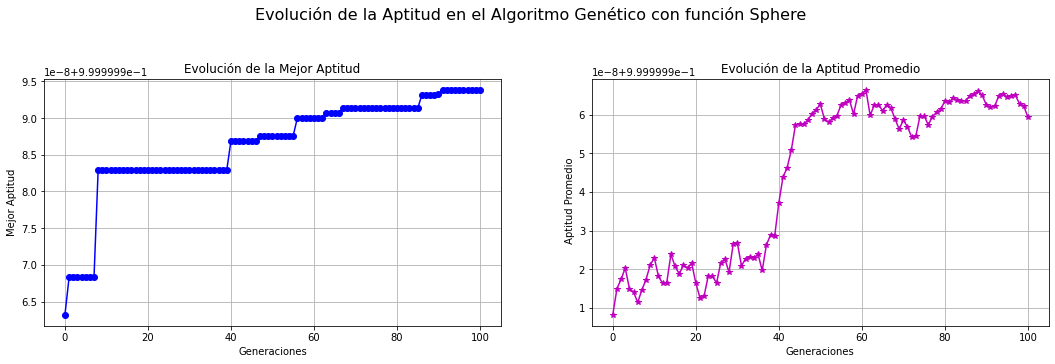

In [108]:
Algoritmo_Genetico_mod(Sphere, intervaloSphere, 10, 
                       35, 15, 14,     
                       0.1, 100)

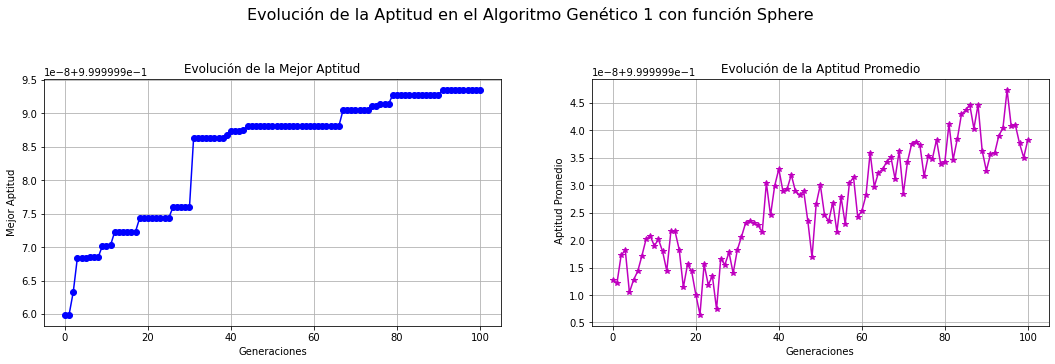

In [101]:
Algoritmo_Genetico_mod(Sphere, intervaloSphere, 10,  # Modificamos la proba
                       35, 15, 14,     
                       0.9, 100)

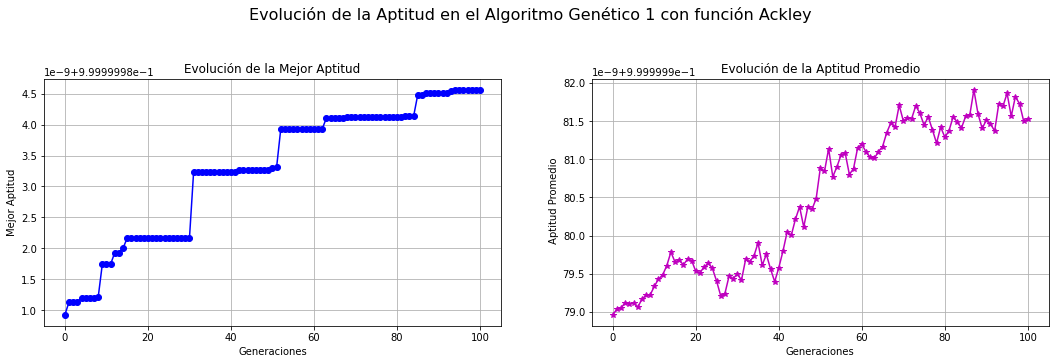

In [103]:
Algoritmo_Genetico_mod(Ackley, intervaloAckley, 10, 
                       35, 15, 14,     
                       0.1, 100)

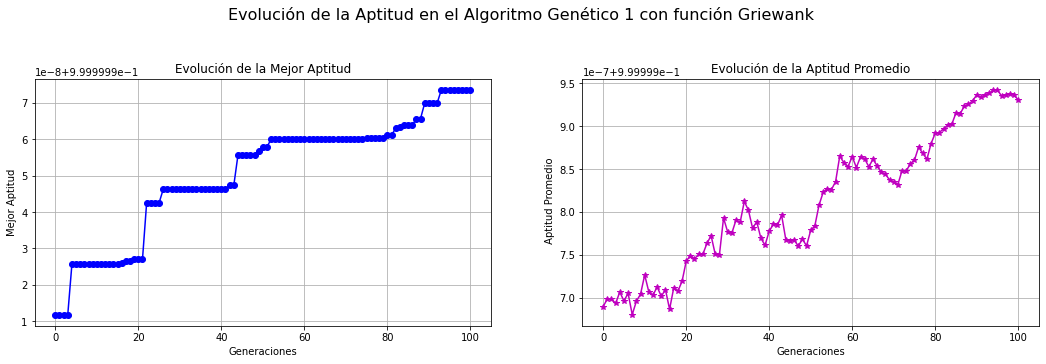

In [93]:
Algoritmo_Genetico_mod(Griewank, intervaloGriewank, 10, 
                       35, 15, 14,     
                       0.1, 100)

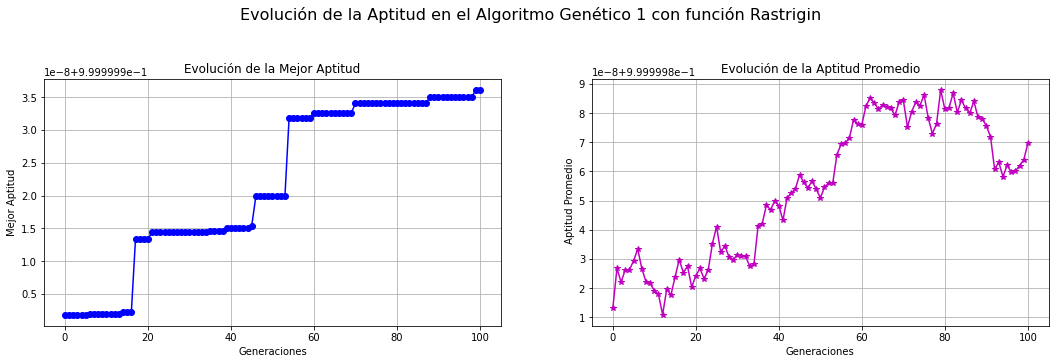

In [94]:
Algoritmo_Genetico_mod(Rastrigin, intervaloRastrigin, 10, 
                       35, 15, 14,     
                       0.1, 100)

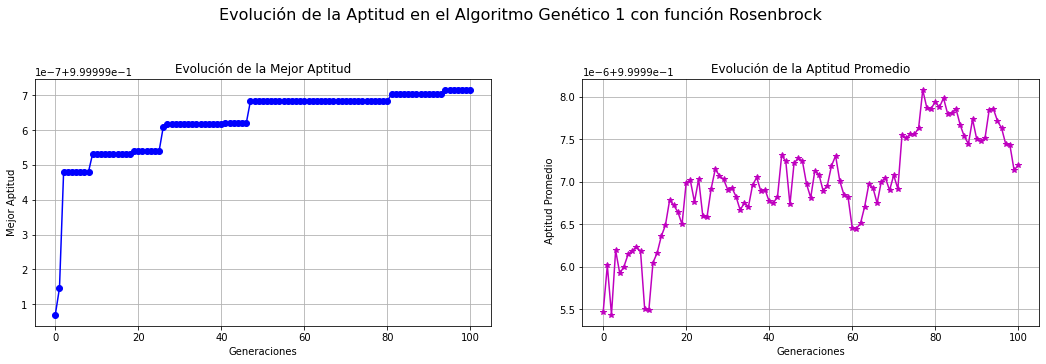

In [95]:
Algoritmo_Genetico_mod(Rosenbrock, intervaloRosenbrock, 10, 
                       35, 15, 14,     
                       0.1, 100)